In [2]:
pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import xgboost as xgb
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
import random
import tensorflow as tf
curr_dir = os.getcwd()

In [3]:
# def generate_test(group_number,curr_dir):
#     df_7 = pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\train\\")+"removed_group"+str(group_number)+'_2107.csv')
#     df_8 = pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\train\\")+"removed_group"+str(group_number)+'_2108.csv')
    
# #     7월
#     p= 0.1
#     random.seed(7)
#     m_7 = df_7.shape[0]
#     x_7 = list(range(0, m_7))
#     random.shuffle(x_7)
#     random_index = x_7[:int(m_7*p)]
#     random_index = sorted(random_index)
    
#     train_7 = pd.DataFrame()
#     for i in random_index:
#         loc = df_7.loc[[i]]
#         train_7=pd.concat([train_7,loc])
#     train_7.to_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\test\\")+"test_7.csv", index = False)
    
#     test_random_index = list(set(x_7)-set(random_index))
#     test_7 = pd.DataFrame()
#     for i in tqdm(test_random_index):
#         loc = df_7.loc[[i]]
#         test_7 = pd.concat([test_7 , loc])
#     test_7.to_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\train\\")+"train_7.csv", index = False)

# #     8월
#     m_8 = df_8.shape[0]
#     x_8 = list(range(0, m_8))
#     random.shuffle(x_8)
#     random_index_8 = x_8[:int(m_8*p)]
#     random_index_8 = sorted(random_index_8)
    
#     train_8 = pd.DataFrame()
#     for i in random_index_8:
#         loc = df_8.loc[[i]]
#         train_8=pd.concat([train_8,loc])
#     train_8.to_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\test\\")+"test_8.csv", index = False)   
    
#     test_random_index_8 = list(set(x_8)-set(random_index_8))
#     test_8 = pd.DataFrame()
#     for i in tqdm(test_random_index_8):
#         loc = df_8.loc[[i]]
#         test_8 = pd.concat([test_8 , loc])
#     test_8.to_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\train\\")+"train_8.csv", index = False)

In [4]:
# for i in range(1, 8):
#     generate_test(i, curr_dir)

100%|██████████| 2567/2567 [00:01<00:00, 1599.01it/s]


In [ ]:
# TA -> LST로 가는 코드

In [10]:
def model_train(group_number, curr_dir):
 
    path_train = os.path.join(curr_dir, "group"+str(group_number)+"\\train")
    path_test = os.path.join(curr_dir, "group"+str(group_number)+"\\test")
    
    folders_tr = os.listdir(path_train)
    folders_test = os.listdir(path_test)
    
    train = pd.DataFrame()
    for files in folders_tr:
        df= pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\train\\")+files)
        train = pd.concat([train, df])            
              
    
    test = pd.DataFrame()
    for files in folders_test:
        df= pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\test\\")+files)
        test = pd.concat([test, df])   
   


    path_val = os.path.join(curr_dir, "group"+str(group_number)+"\\validation")
    folders_val = os.listdir(path_val)
    
    validation = pd.DataFrame()
    for files in folders_val:
        df= pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\validation\\")+files)
        validation = pd.concat([validation, df])        
        
    validation_ = validation.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat'])
   



    X_train_TA = train.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat', 'isitu-LST', 'insitu-TA'])
    X_test_TA = test.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat', 'isitu-LST', 'insitu-TA'])
    
    X_train_LST = train.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat', 'isitu-LST'])
    X_test_LST = test.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat', 'isitu-LST'])
    
    y_train_LST=train[['isitu-LST']].values
    y_test_LST=test[['isitu-LST']].values
    
    y_train_TA=train[['insitu-TA']].values
    y_test_TA=test[['insitu-TA']].values
    
    
    # TA train
    xgb_modelv4_TA = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.017, max_depth=11, subsample=0.5, colsample_bytree=0.7,\
                                   random_state = 2000).fit(X_train_TA, y_train_TA,\
                                                                             eval_set=[(X_test_TA, y_test_TA)], early_stopping_rounds=15)
    filename = 'xgb_modelv4_TA.model'
    xgb_modelv4_TA.save_model(filename) #save
    new_xgb_modelv4_TA = xgb.XGBRegressor() # 모델 초기화
    new_xgb_modelv4_TA.load_model(filename) # 모델 불러오기
    
    feature_importance = xgb_modelv4_TA.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(12, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test_TA.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()
    
    prediction_TA = new_xgb_modelv4_TA.predict(validation_)
    

    validation_['insitu-TA'] = prediction_TA                     # 피쳐 추가
    
    # LST train
    xgb_modelv4_LST = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.017, max_depth=11, subsample=0.5, colsample_bytree=0.7,\
                                   random_state = 2000).fit(X_train_LST, y_train_LST,\
                                                                             eval_set=[(X_test_LST, y_test_LST)], early_stopping_rounds=15)
    filename = 'xgb_modelv4_LST.model'
    xgb_modelv4_LST.save_model(filename) #save
    new_xgb_modelv4_LST = xgb.XGBRegressor() # 모델 초기화
    new_xgb_modelv4_LST.load_model(filename) # 모델 불러오기
    
    feature_importance = xgb_modelv4_LST.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(12, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test_LST.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

    prediction_LST = new_xgb_modelv4_LST.predict(validation_)
    
    validation_partial = validation[['YearMonthDayHourMinute', 'STN']]   
    validation_partial = validation_partial.assign(LST = prediction_LST)       # 순서 조심
    validation_partial = validation_partial.assign(TA = prediction_TA) 
    validation_partial.to_csv("validation_group"+str(group_number)+"_v4.csv", index = False)

In [23]:
# LST , TA 순서바꿔서 저장했을 경우 수정하는 코드
# for i in range(1,8):
#     df = pd.read_csv("validation_group"+str(i)+"_v4.csv")
#     col_list = df.columns.tolist()
#     new_col_list = []
#     new_col_list.append(col_list[0])
#     new_col_list.append(col_list[1])
#     new_col_list.append(col_list[3])
#     new_col_list.append(col_list[2])
#     df2 = df[new_col_list]
#     df2.to_csv("validation_group"+str(i)+"_v4.csv", index = False)

In [4]:
# def model_train_feature_selection(group_number, curr_dir):
 
#     path_train = os.path.join(curr_dir, "group"+str(group_number)+"\\train")
#     path_test = os.path.join(curr_dir, "group"+str(group_number)+"\\test")
    
#     folders_tr = os.listdir(path_train)
#     folders_test = os.listdir(path_test)
    
#     train = pd.DataFrame()
#     for files in folders_tr:
#         df= pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\train\\")+files)
#         train = pd.concat([train, df])            
              
    
#     test = pd.DataFrame()
#     for files in folders_test:
#         df= pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\test\\")+files)
#         test = pd.concat([test, df])   
               
#     X_train = train.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat', 'isitu-LST', 'insitu-TA'])
#     X_test = test.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat', 'isitu-LST', 'insitu-TA'])
#     y_train=train[['isitu-LST', 'insitu-TA']].values
#     y_test=test[['isitu-LST', 'insitu-TA']].values

#     xgb_modelv4 = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.017, max_depth=11, subsample=0.5,colsample_bytree=0.7,  random_state = 2000).fit(X_train,y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=15)
#     filename = 'xgb_modelv4.model'
#     xgb_modelv4.save_model(filename) #save
#     new_xgb_modelv4 = xgb.XGBRegressor() # 모델 초기화
#     new_xgb_modelv4.load_model(filename) # 모델 불러오기
    
#     feature_importance = xgb_modelv4.feature_importances_
#     sorted_idx = np.argsort(feature_importance)
#     fig = plt.figure(figsize=(12, 6))
#     plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
#     plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#     plt.title('Feature Importance')
#     plt.show()
    
#     path_val = os.path.join(curr_dir, "group"+str(group_number)+"\\validation")
#     folders_val = os.listdir(path_val)
    
#     validation = pd.DataFrame()
#     for files in folders_val:
#         df= pd.read_csv(os.path.join(curr_dir, "group"+str(group_number)+"\\validation\\")+files)
#         validation = pd.concat([validation, df])        
        
#     validation_ = validation.drop(columns = ['YearMonthDayHourMinute','STN', 'Lon', 'Lat'])
#     prediction = new_xgb_modelv4.predict(validation_)
    
#     validation_partial = validation[['YearMonthDayHourMinute', 'STN']]
#     validation_partial = validation_partial.assign(LST = prediction[:, 0])
#     validation_partial = validation_partial.assign(TA = prediction[:, 1])
#     validation_partial.to_csv("validation_group"+str(group_number)+"_v4.csv", index = False)

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:26.35167
[1]	validation_0-rmse:25.90670
[2]	validation_0-rmse:25.46930
[3]	validation_0-rmse:25.03753
[4]	validation_0-rmse:24.61427
[5]	validation_0-rmse:24.19758
[6]	validation_0-rmse:23.78919
[7]	validation_0-rmse:23.38683
[8]	validation_0-rmse:22.99239
[9]	validation_0-rmse:22.60391
[10]	validation_0-rmse:22.22271
[11]	validation_0-rmse:21.84640
[12]	validation_0-rmse:21.47747
[13]	validation_0-rmse:21.11405
[14]	validation_0-rmse:20.75656
[15]	validation_0-rmse:20.40583
[16]	validation_0-rmse:20.06031
[17]	validation_0-rmse:19.72012
[18]	validation_0-rmse:19.38719
[19]	validation_0-rmse:19.06003
[20]	validation_0-rmse:18.73658
[21]	validation_0-rmse:18.42026
[22]	validation_0-rmse:18.10804
[23]	validation_0-rmse:17.80114
[24]	validation_0-rmse:17.49954
[25]	validation_0-rmse:17.20323
[26]	validation_0-rmse:16.91175
[27]	validation_0-rmse:16.62558
[28]	validation_0-rmse:16.34389
[29]	validation_0-rmse:16.06651
[30]	validation_0-rmse:15.79510
[31]	validation_0-

[258]	validation_0-rmse:0.40924
[259]	validation_0-rmse:0.40426
[260]	validation_0-rmse:0.39927
[261]	validation_0-rmse:0.39510
[262]	validation_0-rmse:0.39102
[263]	validation_0-rmse:0.38703
[264]	validation_0-rmse:0.38296
[265]	validation_0-rmse:0.37844
[266]	validation_0-rmse:0.37462
[267]	validation_0-rmse:0.37041
[268]	validation_0-rmse:0.36644
[269]	validation_0-rmse:0.36301
[270]	validation_0-rmse:0.35967
[271]	validation_0-rmse:0.35633
[272]	validation_0-rmse:0.35309
[273]	validation_0-rmse:0.34942
[274]	validation_0-rmse:0.34579
[275]	validation_0-rmse:0.34284
[276]	validation_0-rmse:0.33992
[277]	validation_0-rmse:0.33651
[278]	validation_0-rmse:0.33377
[279]	validation_0-rmse:0.33038
[280]	validation_0-rmse:0.32710
[281]	validation_0-rmse:0.32397
[282]	validation_0-rmse:0.32146
[283]	validation_0-rmse:0.31886
[284]	validation_0-rmse:0.31571
[285]	validation_0-rmse:0.31331
[286]	validation_0-rmse:0.31105
[287]	validation_0-rmse:0.30880
[288]	validation_0-rmse:0.30583
[289]	va

[515]	validation_0-rmse:0.17358
[516]	validation_0-rmse:0.17320
[517]	validation_0-rmse:0.17306
[518]	validation_0-rmse:0.17300
[519]	validation_0-rmse:0.17294
[520]	validation_0-rmse:0.17278
[521]	validation_0-rmse:0.17265
[522]	validation_0-rmse:0.17253
[523]	validation_0-rmse:0.17240
[524]	validation_0-rmse:0.17231
[525]	validation_0-rmse:0.17198
[526]	validation_0-rmse:0.17184
[527]	validation_0-rmse:0.17175
[528]	validation_0-rmse:0.17136
[529]	validation_0-rmse:0.17131
[530]	validation_0-rmse:0.17111
[531]	validation_0-rmse:0.17096
[532]	validation_0-rmse:0.17084
[533]	validation_0-rmse:0.17065
[534]	validation_0-rmse:0.17049
[535]	validation_0-rmse:0.17036
[536]	validation_0-rmse:0.17003
[537]	validation_0-rmse:0.16991
[538]	validation_0-rmse:0.16986
[539]	validation_0-rmse:0.16973
[540]	validation_0-rmse:0.16955
[541]	validation_0-rmse:0.16938
[542]	validation_0-rmse:0.16923
[543]	validation_0-rmse:0.16913
[544]	validation_0-rmse:0.16906
[545]	validation_0-rmse:0.16901
[546]	va

[772]	validation_0-rmse:0.14135
[773]	validation_0-rmse:0.14123
[774]	validation_0-rmse:0.14113
[775]	validation_0-rmse:0.14105
[776]	validation_0-rmse:0.14097
[777]	validation_0-rmse:0.14090
[778]	validation_0-rmse:0.14076
[779]	validation_0-rmse:0.14069
[780]	validation_0-rmse:0.14060
[781]	validation_0-rmse:0.14054
[782]	validation_0-rmse:0.14046
[783]	validation_0-rmse:0.14039
[784]	validation_0-rmse:0.14034
[785]	validation_0-rmse:0.14024
[786]	validation_0-rmse:0.14013
[787]	validation_0-rmse:0.14010
[788]	validation_0-rmse:0.13998
[789]	validation_0-rmse:0.13976
[790]	validation_0-rmse:0.13970
[791]	validation_0-rmse:0.13966
[792]	validation_0-rmse:0.13944
[793]	validation_0-rmse:0.13939
[794]	validation_0-rmse:0.13934
[795]	validation_0-rmse:0.13925
[796]	validation_0-rmse:0.13913
[797]	validation_0-rmse:0.13909
[798]	validation_0-rmse:0.13895
[799]	validation_0-rmse:0.13878
[800]	validation_0-rmse:0.13873
[801]	validation_0-rmse:0.13865
[802]	validation_0-rmse:0.13849
[803]	va

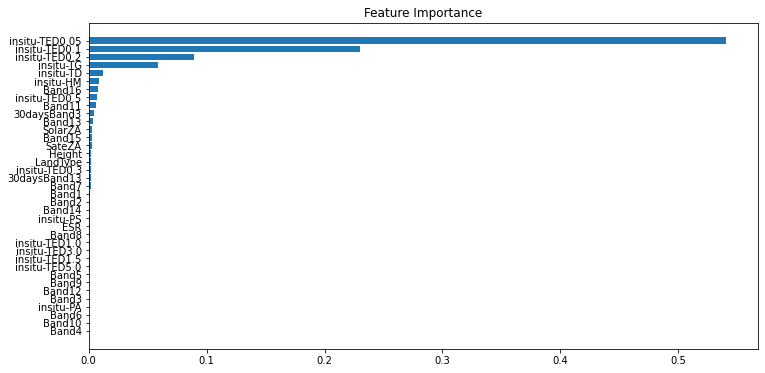

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:30.66901
[1]	validation_0-rmse:30.15423
[2]	validation_0-rmse:29.65321
[3]	validation_0-rmse:29.15484
[4]	validation_0-rmse:28.66536
[5]	validation_0-rmse:28.18323
[6]	validation_0-rmse:27.71283
[7]	validation_0-rmse:27.24744
[8]	validation_0-rmse:26.79281
[9]	validation_0-rmse:26.34238
[10]	validation_0-rmse:25.89994
[11]	validation_0-rmse:25.46606
[12]	validation_0-rmse:25.03875
[13]	validation_0-rmse:24.62028
[14]	validation_0-rmse:24.20792
[15]	validation_0-rmse:23.80339
[16]	validation_0-rmse:23.40584
[17]	validation_0-rmse:23.01498
[18]	validation_0-rmse:22.63067
[19]	validation_0-rmse:22.25218
[20]	validation_0-rmse:21.88000
[21]	validation_0-rmse:21.51354
[22]	validation_0-rmse:21.15484
[23]	validation_0-rmse:20.80289
[24]	validation_0-rmse:20.45499
[25]	validation_0-rmse:20.11339
[26]	validation_0-rmse:19.77722
[27]	validation_0-rmse:19.44710
[28]	validation_0-rmse:19.12322
[29]	validation_0-rmse:18.80360
[30]	validation_0-rmse:18.49060
[31]	validation_0-

[258]	validation_0-rmse:1.30680
[259]	validation_0-rmse:1.30417
[260]	validation_0-rmse:1.30082
[261]	validation_0-rmse:1.29815
[262]	validation_0-rmse:1.29472
[263]	validation_0-rmse:1.29011
[264]	validation_0-rmse:1.28718
[265]	validation_0-rmse:1.28229
[266]	validation_0-rmse:1.27824
[267]	validation_0-rmse:1.27607
[268]	validation_0-rmse:1.27246
[269]	validation_0-rmse:1.27016
[270]	validation_0-rmse:1.26670
[271]	validation_0-rmse:1.26516
[272]	validation_0-rmse:1.26329
[273]	validation_0-rmse:1.26079
[274]	validation_0-rmse:1.25885
[275]	validation_0-rmse:1.25688
[276]	validation_0-rmse:1.25462
[277]	validation_0-rmse:1.25202
[278]	validation_0-rmse:1.24960
[279]	validation_0-rmse:1.24721
[280]	validation_0-rmse:1.24431
[281]	validation_0-rmse:1.24120
[282]	validation_0-rmse:1.23955
[283]	validation_0-rmse:1.23670
[284]	validation_0-rmse:1.23520
[285]	validation_0-rmse:1.23387
[286]	validation_0-rmse:1.23167
[287]	validation_0-rmse:1.23000
[288]	validation_0-rmse:1.22647
[289]	va

[515]	validation_0-rmse:0.98949
[516]	validation_0-rmse:0.98944
[517]	validation_0-rmse:0.98876
[518]	validation_0-rmse:0.98833
[519]	validation_0-rmse:0.98793
[520]	validation_0-rmse:0.98654
[521]	validation_0-rmse:0.98601
[522]	validation_0-rmse:0.98521
[523]	validation_0-rmse:0.98452
[524]	validation_0-rmse:0.98393
[525]	validation_0-rmse:0.98238
[526]	validation_0-rmse:0.98186
[527]	validation_0-rmse:0.98174
[528]	validation_0-rmse:0.98114
[529]	validation_0-rmse:0.98051
[530]	validation_0-rmse:0.98041
[531]	validation_0-rmse:0.97991
[532]	validation_0-rmse:0.97986
[533]	validation_0-rmse:0.97902
[534]	validation_0-rmse:0.97899
[535]	validation_0-rmse:0.97782
[536]	validation_0-rmse:0.97731
[537]	validation_0-rmse:0.97560
[538]	validation_0-rmse:0.97417
[539]	validation_0-rmse:0.97325
[540]	validation_0-rmse:0.97216
[541]	validation_0-rmse:0.97174
[542]	validation_0-rmse:0.97117
[543]	validation_0-rmse:0.97088
[544]	validation_0-rmse:0.97074
[545]	validation_0-rmse:0.97045
[546]	va

[772]	validation_0-rmse:0.85606
[773]	validation_0-rmse:0.85584
[774]	validation_0-rmse:0.85434
[775]	validation_0-rmse:0.85424
[776]	validation_0-rmse:0.85367
[777]	validation_0-rmse:0.85366
[778]	validation_0-rmse:0.85251
[779]	validation_0-rmse:0.85234
[780]	validation_0-rmse:0.85195
[781]	validation_0-rmse:0.85179
[782]	validation_0-rmse:0.85166
[783]	validation_0-rmse:0.85146
[784]	validation_0-rmse:0.85121
[785]	validation_0-rmse:0.85032
[786]	validation_0-rmse:0.84989
[787]	validation_0-rmse:0.84958
[788]	validation_0-rmse:0.84884
[789]	validation_0-rmse:0.84872
[790]	validation_0-rmse:0.84851
[791]	validation_0-rmse:0.84815
[792]	validation_0-rmse:0.84815
[793]	validation_0-rmse:0.84737
[794]	validation_0-rmse:0.84696
[795]	validation_0-rmse:0.84663
[796]	validation_0-rmse:0.84577
[797]	validation_0-rmse:0.84565
[798]	validation_0-rmse:0.84565
[799]	validation_0-rmse:0.84509
[800]	validation_0-rmse:0.84454
[801]	validation_0-rmse:0.84412
[802]	validation_0-rmse:0.84397
[803]	va

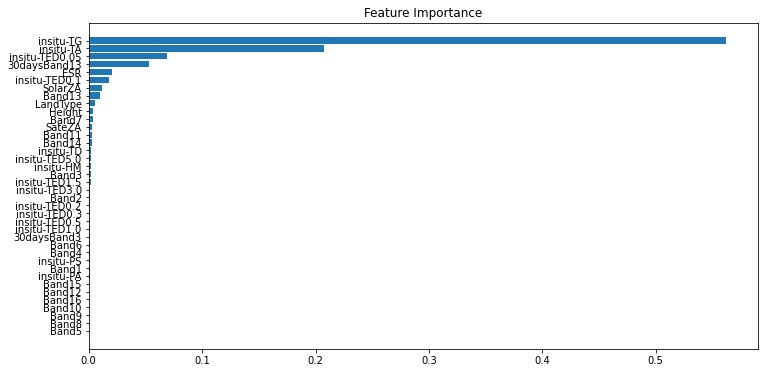

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:26.27688
[1]	validation_0-rmse:25.83493
[2]	validation_0-rmse:25.39931
[3]	validation_0-rmse:24.96979
[4]	validation_0-rmse:24.55142
[5]	validation_0-rmse:24.13692
[6]	validation_0-rmse:23.72999
[7]	validation_0-rmse:23.32925
[8]	validation_0-rmse:22.93540
[9]	validation_0-rmse:22.54869
[10]	validation_0-rmse:22.17203
[11]	validation_0-rmse:21.79856
[12]	validation_0-rmse:21.43073
[13]	validation_0-rmse:21.07018
[14]	validation_0-rmse:20.71488
[15]	validation_0-rmse:20.36509
[16]	validation_0-rmse:20.02140
[17]	validation_0-rmse:19.68351
[18]	validation_0-rmse:19.35080
[19]	validation_0-rmse:19.02470
[20]	validation_0-rmse:18.70389
[21]	validation_0-rmse:18.38890
[22]	validation_0-rmse:18.07762
[23]	validation_0-rmse:17.77326
[24]	validation_0-rmse:17.47362
[25]	validation_0-rmse:17.17876
[26]	validation_0-rmse:16.88846
[27]	validation_0-rmse:16.60314
[28]	validation_0-rmse:16.32210
[29]	validation_0-rmse:16.04557
[30]	validation_0-rmse:15.77465
[31]	validation_0-

[258]	validation_0-rmse:0.45176
[259]	validation_0-rmse:0.44721
[260]	validation_0-rmse:0.44350
[261]	validation_0-rmse:0.43996
[262]	validation_0-rmse:0.43568
[263]	validation_0-rmse:0.43248
[264]	validation_0-rmse:0.42821
[265]	validation_0-rmse:0.42496
[266]	validation_0-rmse:0.42078
[267]	validation_0-rmse:0.41675
[268]	validation_0-rmse:0.41365
[269]	validation_0-rmse:0.41057
[270]	validation_0-rmse:0.40779
[271]	validation_0-rmse:0.40497
[272]	validation_0-rmse:0.40124
[273]	validation_0-rmse:0.39764
[274]	validation_0-rmse:0.39427
[275]	validation_0-rmse:0.39151
[276]	validation_0-rmse:0.38881
[277]	validation_0-rmse:0.38550
[278]	validation_0-rmse:0.38331
[279]	validation_0-rmse:0.38111
[280]	validation_0-rmse:0.37876
[281]	validation_0-rmse:0.37668
[282]	validation_0-rmse:0.37379
[283]	validation_0-rmse:0.37073
[284]	validation_0-rmse:0.36850
[285]	validation_0-rmse:0.36641
[286]	validation_0-rmse:0.36448
[287]	validation_0-rmse:0.36257
[288]	validation_0-rmse:0.35979
[289]	va

[515]	validation_0-rmse:0.21392
[516]	validation_0-rmse:0.21350
[517]	validation_0-rmse:0.21302
[518]	validation_0-rmse:0.21246
[519]	validation_0-rmse:0.21232
[520]	validation_0-rmse:0.21217
[521]	validation_0-rmse:0.21201
[522]	validation_0-rmse:0.21183
[523]	validation_0-rmse:0.21153
[524]	validation_0-rmse:0.21141
[525]	validation_0-rmse:0.21129
[526]	validation_0-rmse:0.21085
[527]	validation_0-rmse:0.21062
[528]	validation_0-rmse:0.21044
[529]	validation_0-rmse:0.21022
[530]	validation_0-rmse:0.21011
[531]	validation_0-rmse:0.20991
[532]	validation_0-rmse:0.20972
[533]	validation_0-rmse:0.20928
[534]	validation_0-rmse:0.20913
[535]	validation_0-rmse:0.20873
[536]	validation_0-rmse:0.20860
[537]	validation_0-rmse:0.20839
[538]	validation_0-rmse:0.20836
[539]	validation_0-rmse:0.20810
[540]	validation_0-rmse:0.20780
[541]	validation_0-rmse:0.20763
[542]	validation_0-rmse:0.20733
[543]	validation_0-rmse:0.20718
[544]	validation_0-rmse:0.20702
[545]	validation_0-rmse:0.20689
[546]	va

[772]	validation_0-rmse:0.17365
[773]	validation_0-rmse:0.17359
[774]	validation_0-rmse:0.17350
[775]	validation_0-rmse:0.17332
[776]	validation_0-rmse:0.17329
[777]	validation_0-rmse:0.17325
[778]	validation_0-rmse:0.17308
[779]	validation_0-rmse:0.17297
[780]	validation_0-rmse:0.17272
[781]	validation_0-rmse:0.17267
[782]	validation_0-rmse:0.17256
[783]	validation_0-rmse:0.17236
[784]	validation_0-rmse:0.17215
[785]	validation_0-rmse:0.17208
[786]	validation_0-rmse:0.17194
[787]	validation_0-rmse:0.17177
[788]	validation_0-rmse:0.17164
[789]	validation_0-rmse:0.17157
[790]	validation_0-rmse:0.17155
[791]	validation_0-rmse:0.17152
[792]	validation_0-rmse:0.17145
[793]	validation_0-rmse:0.17129
[794]	validation_0-rmse:0.17126
[795]	validation_0-rmse:0.17122
[796]	validation_0-rmse:0.17117
[797]	validation_0-rmse:0.17107
[798]	validation_0-rmse:0.17102
[799]	validation_0-rmse:0.17090
[800]	validation_0-rmse:0.17087
[801]	validation_0-rmse:0.17079
[802]	validation_0-rmse:0.17060
[803]	va

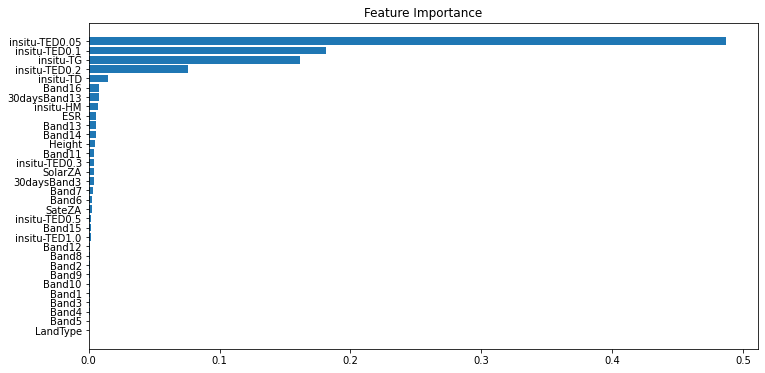

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:30.72824
[1]	validation_0-rmse:30.21029
[2]	validation_0-rmse:29.70946
[3]	validation_0-rmse:29.21388
[4]	validation_0-rmse:28.72437
[5]	validation_0-rmse:28.24105
[6]	validation_0-rmse:27.76763
[7]	validation_0-rmse:27.30221
[8]	validation_0-rmse:26.84570
[9]	validation_0-rmse:26.39450
[10]	validation_0-rmse:25.95524
[11]	validation_0-rmse:25.52249
[12]	validation_0-rmse:25.09775
[13]	validation_0-rmse:24.67662
[14]	validation_0-rmse:24.26343
[15]	validation_0-rmse:23.85776
[16]	validation_0-rmse:23.45918
[17]	validation_0-rmse:23.06753
[18]	validation_0-rmse:22.68275
[19]	validation_0-rmse:22.30411
[20]	validation_0-rmse:21.93071
[21]	validation_0-rmse:21.56631
[22]	validation_0-rmse:21.20810
[23]	validation_0-rmse:20.85373
[24]	validation_0-rmse:20.50710
[25]	validation_0-rmse:20.16697
[26]	validation_0-rmse:19.83199
[27]	validation_0-rmse:19.50144
[28]	validation_0-rmse:19.18032
[29]	validation_0-rmse:18.86162
[30]	validation_0-rmse:18.54770
[31]	validation_0-

[258]	validation_0-rmse:1.22454
[259]	validation_0-rmse:1.21920
[260]	validation_0-rmse:1.21343
[261]	validation_0-rmse:1.20818
[262]	validation_0-rmse:1.20437
[263]	validation_0-rmse:1.20107
[264]	validation_0-rmse:1.19823
[265]	validation_0-rmse:1.19515
[266]	validation_0-rmse:1.19117
[267]	validation_0-rmse:1.18703
[268]	validation_0-rmse:1.18434
[269]	validation_0-rmse:1.18131
[270]	validation_0-rmse:1.17740
[271]	validation_0-rmse:1.17338
[272]	validation_0-rmse:1.16914
[273]	validation_0-rmse:1.16569
[274]	validation_0-rmse:1.16157
[275]	validation_0-rmse:1.15747
[276]	validation_0-rmse:1.15387
[277]	validation_0-rmse:1.15096
[278]	validation_0-rmse:1.14832
[279]	validation_0-rmse:1.14438
[280]	validation_0-rmse:1.14195
[281]	validation_0-rmse:1.13958
[282]	validation_0-rmse:1.13685
[283]	validation_0-rmse:1.13524
[284]	validation_0-rmse:1.13174
[285]	validation_0-rmse:1.12958
[286]	validation_0-rmse:1.12669
[287]	validation_0-rmse:1.12325
[288]	validation_0-rmse:1.11963
[289]	va

[515]	validation_0-rmse:0.86010
[516]	validation_0-rmse:0.85906
[517]	validation_0-rmse:0.85871
[518]	validation_0-rmse:0.85667
[519]	validation_0-rmse:0.85611
[520]	validation_0-rmse:0.85458
[521]	validation_0-rmse:0.85453
[522]	validation_0-rmse:0.85441
[523]	validation_0-rmse:0.85329
[524]	validation_0-rmse:0.85293
[525]	validation_0-rmse:0.85216
[526]	validation_0-rmse:0.85137
[527]	validation_0-rmse:0.85137
[528]	validation_0-rmse:0.85136
[529]	validation_0-rmse:0.85063
[530]	validation_0-rmse:0.85015
[531]	validation_0-rmse:0.84956
[532]	validation_0-rmse:0.84902
[533]	validation_0-rmse:0.84805
[534]	validation_0-rmse:0.84752
[535]	validation_0-rmse:0.84717
[536]	validation_0-rmse:0.84664
[537]	validation_0-rmse:0.84527
[538]	validation_0-rmse:0.84480
[539]	validation_0-rmse:0.84338
[540]	validation_0-rmse:0.84298
[541]	validation_0-rmse:0.84134
[542]	validation_0-rmse:0.84042
[543]	validation_0-rmse:0.83993
[544]	validation_0-rmse:0.83994
[545]	validation_0-rmse:0.83949
[546]	va

[772]	validation_0-rmse:0.74053
[773]	validation_0-rmse:0.74007
[774]	validation_0-rmse:0.73964
[775]	validation_0-rmse:0.73940
[776]	validation_0-rmse:0.73940
[777]	validation_0-rmse:0.73939
[778]	validation_0-rmse:0.73939
[779]	validation_0-rmse:0.73912
[780]	validation_0-rmse:0.73856
[781]	validation_0-rmse:0.73822
[782]	validation_0-rmse:0.73797
[783]	validation_0-rmse:0.73780
[784]	validation_0-rmse:0.73746
[785]	validation_0-rmse:0.73715
[786]	validation_0-rmse:0.73705
[787]	validation_0-rmse:0.73689
[788]	validation_0-rmse:0.73657
[789]	validation_0-rmse:0.73648
[790]	validation_0-rmse:0.73648
[791]	validation_0-rmse:0.73595
[792]	validation_0-rmse:0.73582
[793]	validation_0-rmse:0.73480
[794]	validation_0-rmse:0.73442
[795]	validation_0-rmse:0.73431
[796]	validation_0-rmse:0.73426
[797]	validation_0-rmse:0.73340
[798]	validation_0-rmse:0.73340
[799]	validation_0-rmse:0.73328
[800]	validation_0-rmse:0.73326
[801]	validation_0-rmse:0.73238
[802]	validation_0-rmse:0.73145
[803]	va

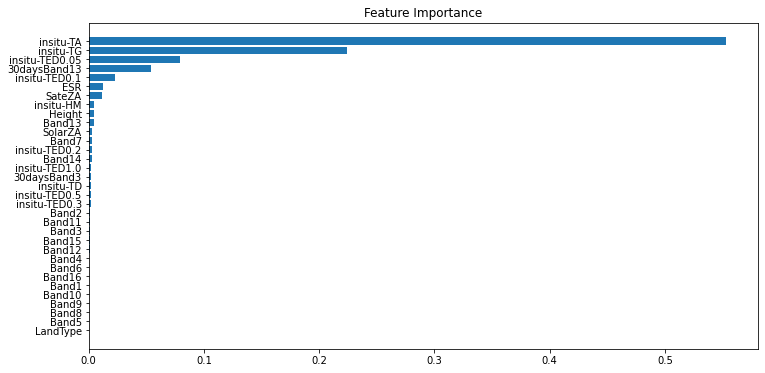

[0]	validation_0-rmse:25.78204


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:25.34423
[2]	validation_0-rmse:24.91499
[3]	validation_0-rmse:24.49458
[4]	validation_0-rmse:24.07943
[5]	validation_0-rmse:23.67237
[6]	validation_0-rmse:23.27313
[7]	validation_0-rmse:22.88022
[8]	validation_0-rmse:22.49308
[9]	validation_0-rmse:22.11374
[10]	validation_0-rmse:21.73834
[11]	validation_0-rmse:21.37100
[12]	validation_0-rmse:21.00861
[13]	validation_0-rmse:20.65398
[14]	validation_0-rmse:20.30438
[15]	validation_0-rmse:19.96011
[16]	validation_0-rmse:19.62351
[17]	validation_0-rmse:19.29177
[18]	validation_0-rmse:18.96471
[19]	validation_0-rmse:18.64375
[20]	validation_0-rmse:18.32991
[21]	validation_0-rmse:18.02057
[22]	validation_0-rmse:17.71566
[23]	validation_0-rmse:17.41717
[24]	validation_0-rmse:17.12183
[25]	validation_0-rmse:16.83239
[26]	validation_0-rmse:16.54818
[27]	validation_0-rmse:16.26859
[28]	validation_0-rmse:15.99292
[29]	validation_0-rmse:15.72346
[30]	validation_0-rmse:15.45775
[31]	validation_0-rmse:15.19677
[32]	validation_0

[259]	validation_0-rmse:0.42072
[260]	validation_0-rmse:0.41664
[261]	validation_0-rmse:0.41206
[262]	validation_0-rmse:0.40768
[263]	validation_0-rmse:0.40377
[264]	validation_0-rmse:0.40004
[265]	validation_0-rmse:0.39607
[266]	validation_0-rmse:0.39199
[267]	validation_0-rmse:0.38859
[268]	validation_0-rmse:0.38533
[269]	validation_0-rmse:0.38209
[270]	validation_0-rmse:0.37891
[271]	validation_0-rmse:0.37526
[272]	validation_0-rmse:0.37179
[273]	validation_0-rmse:0.36897
[274]	validation_0-rmse:0.36621
[275]	validation_0-rmse:0.36274
[276]	validation_0-rmse:0.35995
[277]	validation_0-rmse:0.35756
[278]	validation_0-rmse:0.35435
[279]	validation_0-rmse:0.35113
[280]	validation_0-rmse:0.34806
[281]	validation_0-rmse:0.34507
[282]	validation_0-rmse:0.34229
[283]	validation_0-rmse:0.33957
[284]	validation_0-rmse:0.33730
[285]	validation_0-rmse:0.33495
[286]	validation_0-rmse:0.33294
[287]	validation_0-rmse:0.33088
[288]	validation_0-rmse:0.32882
[289]	validation_0-rmse:0.32631
[290]	va

[516]	validation_0-rmse:0.19567
[517]	validation_0-rmse:0.19544
[518]	validation_0-rmse:0.19508
[519]	validation_0-rmse:0.19492
[520]	validation_0-rmse:0.19479
[521]	validation_0-rmse:0.19443
[522]	validation_0-rmse:0.19408
[523]	validation_0-rmse:0.19381
[524]	validation_0-rmse:0.19360
[525]	validation_0-rmse:0.19348
[526]	validation_0-rmse:0.19342
[527]	validation_0-rmse:0.19324
[528]	validation_0-rmse:0.19312
[529]	validation_0-rmse:0.19305
[530]	validation_0-rmse:0.19302
[531]	validation_0-rmse:0.19292
[532]	validation_0-rmse:0.19274
[533]	validation_0-rmse:0.19240
[534]	validation_0-rmse:0.19229
[535]	validation_0-rmse:0.19210
[536]	validation_0-rmse:0.19197
[537]	validation_0-rmse:0.19160
[538]	validation_0-rmse:0.19159
[539]	validation_0-rmse:0.19135
[540]	validation_0-rmse:0.19134
[541]	validation_0-rmse:0.19110
[542]	validation_0-rmse:0.19100
[543]	validation_0-rmse:0.19092
[544]	validation_0-rmse:0.19084
[545]	validation_0-rmse:0.19056
[546]	validation_0-rmse:0.19040
[547]	va

[773]	validation_0-rmse:0.16288
[774]	validation_0-rmse:0.16286
[775]	validation_0-rmse:0.16281
[776]	validation_0-rmse:0.16277
[777]	validation_0-rmse:0.16263
[778]	validation_0-rmse:0.16256
[779]	validation_0-rmse:0.16238
[780]	validation_0-rmse:0.16237
[781]	validation_0-rmse:0.16235
[782]	validation_0-rmse:0.16234
[783]	validation_0-rmse:0.16230
[784]	validation_0-rmse:0.16222
[785]	validation_0-rmse:0.16219
[786]	validation_0-rmse:0.16209
[787]	validation_0-rmse:0.16207
[788]	validation_0-rmse:0.16200
[789]	validation_0-rmse:0.16192
[790]	validation_0-rmse:0.16176
[791]	validation_0-rmse:0.16175
[792]	validation_0-rmse:0.16160
[793]	validation_0-rmse:0.16144
[794]	validation_0-rmse:0.16136
[795]	validation_0-rmse:0.16133
[796]	validation_0-rmse:0.16128
[797]	validation_0-rmse:0.16113
[798]	validation_0-rmse:0.16105
[799]	validation_0-rmse:0.16092
[800]	validation_0-rmse:0.16089
[801]	validation_0-rmse:0.16081
[802]	validation_0-rmse:0.16075
[803]	validation_0-rmse:0.16067
[804]	va

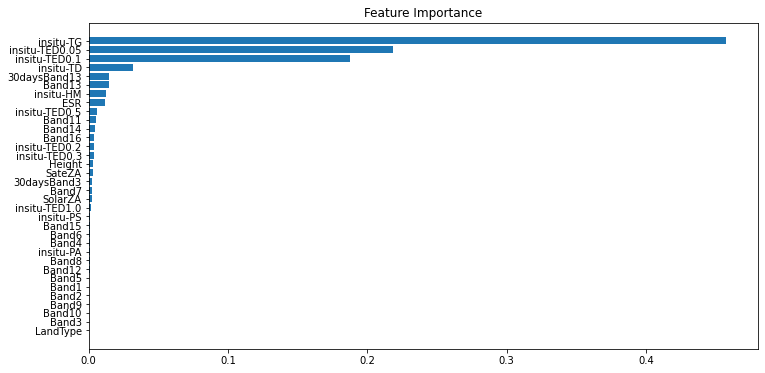

[0]	validation_0-rmse:30.45557


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:29.95145
[2]	validation_0-rmse:29.45710
[3]	validation_0-rmse:28.96547
[4]	validation_0-rmse:28.48860
[5]	validation_0-rmse:28.01882
[6]	validation_0-rmse:27.55765
[7]	validation_0-rmse:27.10088
[8]	validation_0-rmse:26.65319
[9]	validation_0-rmse:26.21368
[10]	validation_0-rmse:25.78006
[11]	validation_0-rmse:25.35649
[12]	validation_0-rmse:24.93785
[13]	validation_0-rmse:24.52341
[14]	validation_0-rmse:24.11703
[15]	validation_0-rmse:23.72107
[16]	validation_0-rmse:23.33131
[17]	validation_0-rmse:22.94317
[18]	validation_0-rmse:22.56452
[19]	validation_0-rmse:22.18997
[20]	validation_0-rmse:21.82233
[21]	validation_0-rmse:21.46357
[22]	validation_0-rmse:21.10728
[23]	validation_0-rmse:20.75973
[24]	validation_0-rmse:20.41716
[25]	validation_0-rmse:20.08093
[26]	validation_0-rmse:19.74841
[27]	validation_0-rmse:19.42612
[28]	validation_0-rmse:19.10556
[29]	validation_0-rmse:18.79192
[30]	validation_0-rmse:18.48322
[31]	validation_0-rmse:18.18018
[32]	validation_0

[259]	validation_0-rmse:1.08498
[260]	validation_0-rmse:1.08004
[261]	validation_0-rmse:1.07593
[262]	validation_0-rmse:1.07211
[263]	validation_0-rmse:1.06846
[264]	validation_0-rmse:1.06443
[265]	validation_0-rmse:1.05959
[266]	validation_0-rmse:1.05610
[267]	validation_0-rmse:1.05219
[268]	validation_0-rmse:1.04833
[269]	validation_0-rmse:1.04470
[270]	validation_0-rmse:1.04158
[271]	validation_0-rmse:1.03895
[272]	validation_0-rmse:1.03541
[273]	validation_0-rmse:1.03130
[274]	validation_0-rmse:1.02860
[275]	validation_0-rmse:1.02448
[276]	validation_0-rmse:1.02211
[277]	validation_0-rmse:1.01892
[278]	validation_0-rmse:1.01576
[279]	validation_0-rmse:1.01175
[280]	validation_0-rmse:1.00795
[281]	validation_0-rmse:1.00535
[282]	validation_0-rmse:1.00244
[283]	validation_0-rmse:0.99965
[284]	validation_0-rmse:0.99649
[285]	validation_0-rmse:0.99427
[286]	validation_0-rmse:0.99232
[287]	validation_0-rmse:0.98977
[288]	validation_0-rmse:0.98733
[289]	validation_0-rmse:0.98410
[290]	va

[516]	validation_0-rmse:0.73796
[517]	validation_0-rmse:0.73741
[518]	validation_0-rmse:0.73688
[519]	validation_0-rmse:0.73679
[520]	validation_0-rmse:0.73673
[521]	validation_0-rmse:0.73619
[522]	validation_0-rmse:0.73518
[523]	validation_0-rmse:0.73494
[524]	validation_0-rmse:0.73452
[525]	validation_0-rmse:0.73389
[526]	validation_0-rmse:0.73271
[527]	validation_0-rmse:0.73198
[528]	validation_0-rmse:0.73103
[529]	validation_0-rmse:0.73014
[530]	validation_0-rmse:0.72961
[531]	validation_0-rmse:0.72921
[532]	validation_0-rmse:0.72876
[533]	validation_0-rmse:0.72841
[534]	validation_0-rmse:0.72790
[535]	validation_0-rmse:0.72749
[536]	validation_0-rmse:0.72661
[537]	validation_0-rmse:0.72641
[538]	validation_0-rmse:0.72552
[539]	validation_0-rmse:0.72518
[540]	validation_0-rmse:0.72472
[541]	validation_0-rmse:0.72456
[542]	validation_0-rmse:0.72352
[543]	validation_0-rmse:0.72328
[544]	validation_0-rmse:0.72312
[545]	validation_0-rmse:0.72285
[546]	validation_0-rmse:0.72234
[547]	va

[773]	validation_0-rmse:0.65175
[774]	validation_0-rmse:0.65161
[775]	validation_0-rmse:0.65159
[776]	validation_0-rmse:0.65159
[777]	validation_0-rmse:0.65147
[778]	validation_0-rmse:0.65137
[779]	validation_0-rmse:0.65117
[780]	validation_0-rmse:0.65087
[781]	validation_0-rmse:0.65071
[782]	validation_0-rmse:0.65071
[783]	validation_0-rmse:0.65063
[784]	validation_0-rmse:0.65052
[785]	validation_0-rmse:0.65028
[786]	validation_0-rmse:0.65006
[787]	validation_0-rmse:0.64998
[788]	validation_0-rmse:0.64997
[789]	validation_0-rmse:0.64973
[790]	validation_0-rmse:0.64951
[791]	validation_0-rmse:0.64946
[792]	validation_0-rmse:0.64918
[793]	validation_0-rmse:0.64914
[794]	validation_0-rmse:0.64902
[795]	validation_0-rmse:0.64896
[796]	validation_0-rmse:0.64899
[797]	validation_0-rmse:0.64893
[798]	validation_0-rmse:0.64864
[799]	validation_0-rmse:0.64852
[800]	validation_0-rmse:0.64839
[801]	validation_0-rmse:0.64826
[802]	validation_0-rmse:0.64822
[803]	validation_0-rmse:0.64787
[804]	va

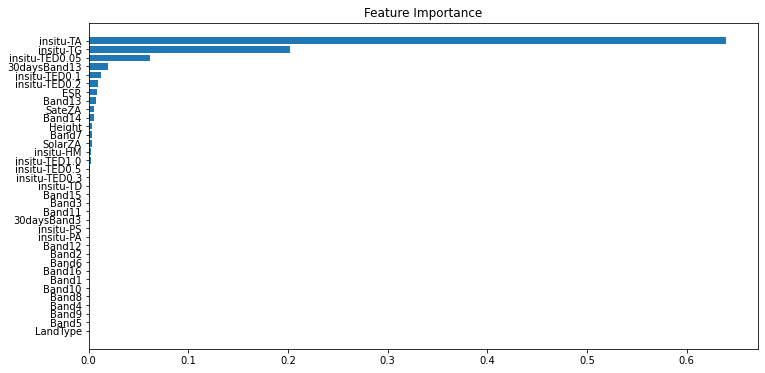

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:26.02208
[1]	validation_0-rmse:25.58258
[2]	validation_0-rmse:25.15013
[3]	validation_0-rmse:24.72385
[4]	validation_0-rmse:24.30379
[5]	validation_0-rmse:23.89198
[6]	validation_0-rmse:23.48770
[7]	validation_0-rmse:23.08971
[8]	validation_0-rmse:22.70146
[9]	validation_0-rmse:22.31656
[10]	validation_0-rmse:21.93918
[11]	validation_0-rmse:21.56733
[12]	validation_0-rmse:21.20249
[13]	validation_0-rmse:20.84374
[14]	validation_0-rmse:20.49206
[15]	validation_0-rmse:20.14425
[16]	validation_0-rmse:19.80383
[17]	validation_0-rmse:19.46854
[18]	validation_0-rmse:19.13907
[19]	validation_0-rmse:18.81500
[20]	validation_0-rmse:18.49595
[21]	validation_0-rmse:18.18290
[22]	validation_0-rmse:17.87637
[23]	validation_0-rmse:17.57396
[24]	validation_0-rmse:17.27581
[25]	validation_0-rmse:16.98297
[26]	validation_0-rmse:16.69569
[27]	validation_0-rmse:16.41326
[28]	validation_0-rmse:16.13532
[29]	validation_0-rmse:15.86234
[30]	validation_0-rmse:15.59367
[31]	validation_0-

[258]	validation_0-rmse:0.42525
[259]	validation_0-rmse:0.42045
[260]	validation_0-rmse:0.41554
[261]	validation_0-rmse:0.41083
[262]	validation_0-rmse:0.40595
[263]	validation_0-rmse:0.40233
[264]	validation_0-rmse:0.39865
[265]	validation_0-rmse:0.39514
[266]	validation_0-rmse:0.39097
[267]	validation_0-rmse:0.38678
[268]	validation_0-rmse:0.38263
[269]	validation_0-rmse:0.37839
[270]	validation_0-rmse:0.37521
[271]	validation_0-rmse:0.37132
[272]	validation_0-rmse:0.36744
[273]	validation_0-rmse:0.36368
[274]	validation_0-rmse:0.36080
[275]	validation_0-rmse:0.35720
[276]	validation_0-rmse:0.35389
[277]	validation_0-rmse:0.35125
[278]	validation_0-rmse:0.34866
[279]	validation_0-rmse:0.34530
[280]	validation_0-rmse:0.34279
[281]	validation_0-rmse:0.34025
[282]	validation_0-rmse:0.33780
[283]	validation_0-rmse:0.33541
[284]	validation_0-rmse:0.33257
[285]	validation_0-rmse:0.33033
[286]	validation_0-rmse:0.32814
[287]	validation_0-rmse:0.32540
[288]	validation_0-rmse:0.32257
[289]	va

[515]	validation_0-rmse:0.18617
[516]	validation_0-rmse:0.18611
[517]	validation_0-rmse:0.18596
[518]	validation_0-rmse:0.18564
[519]	validation_0-rmse:0.18546
[520]	validation_0-rmse:0.18541
[521]	validation_0-rmse:0.18516
[522]	validation_0-rmse:0.18473
[523]	validation_0-rmse:0.18456
[524]	validation_0-rmse:0.18406
[525]	validation_0-rmse:0.18393
[526]	validation_0-rmse:0.18364
[527]	validation_0-rmse:0.18355
[528]	validation_0-rmse:0.18342
[529]	validation_0-rmse:0.18327
[530]	validation_0-rmse:0.18298
[531]	validation_0-rmse:0.18277
[532]	validation_0-rmse:0.18250
[533]	validation_0-rmse:0.18236
[534]	validation_0-rmse:0.18221
[535]	validation_0-rmse:0.18208
[536]	validation_0-rmse:0.18184
[537]	validation_0-rmse:0.18168
[538]	validation_0-rmse:0.18151
[539]	validation_0-rmse:0.18143
[540]	validation_0-rmse:0.18139
[541]	validation_0-rmse:0.18095
[542]	validation_0-rmse:0.18073
[543]	validation_0-rmse:0.18031
[544]	validation_0-rmse:0.18010
[545]	validation_0-rmse:0.18006
[546]	va

[772]	validation_0-rmse:0.14530
[773]	validation_0-rmse:0.14522
[774]	validation_0-rmse:0.14496
[775]	validation_0-rmse:0.14490
[776]	validation_0-rmse:0.14470
[777]	validation_0-rmse:0.14466
[778]	validation_0-rmse:0.14459
[779]	validation_0-rmse:0.14447
[780]	validation_0-rmse:0.14430
[781]	validation_0-rmse:0.14413
[782]	validation_0-rmse:0.14406
[783]	validation_0-rmse:0.14400
[784]	validation_0-rmse:0.14394
[785]	validation_0-rmse:0.14378
[786]	validation_0-rmse:0.14368
[787]	validation_0-rmse:0.14346
[788]	validation_0-rmse:0.14314
[789]	validation_0-rmse:0.14301
[790]	validation_0-rmse:0.14278
[791]	validation_0-rmse:0.14259
[792]	validation_0-rmse:0.14248
[793]	validation_0-rmse:0.14237
[794]	validation_0-rmse:0.14222
[795]	validation_0-rmse:0.14214
[796]	validation_0-rmse:0.14211
[797]	validation_0-rmse:0.14204
[798]	validation_0-rmse:0.14185
[799]	validation_0-rmse:0.14168
[800]	validation_0-rmse:0.14159
[801]	validation_0-rmse:0.14141
[802]	validation_0-rmse:0.14136
[803]	va

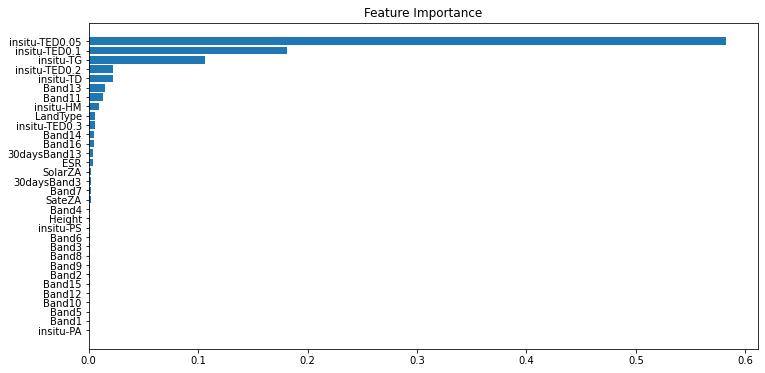

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:30.07274
[1]	validation_0-rmse:29.57108
[2]	validation_0-rmse:29.07372
[3]	validation_0-rmse:28.58455
[4]	validation_0-rmse:28.10262
[5]	validation_0-rmse:27.62918
[6]	validation_0-rmse:27.16381
[7]	validation_0-rmse:26.70714
[8]	validation_0-rmse:26.26172
[9]	validation_0-rmse:25.81921
[10]	validation_0-rmse:25.38385
[11]	validation_0-rmse:24.95734
[12]	validation_0-rmse:24.53799
[13]	validation_0-rmse:24.12523
[14]	validation_0-rmse:23.72018
[15]	validation_0-rmse:23.32255
[16]	validation_0-rmse:22.93071
[17]	validation_0-rmse:22.54562
[18]	validation_0-rmse:22.16808
[19]	validation_0-rmse:21.79567
[20]	validation_0-rmse:21.43050
[21]	validation_0-rmse:21.07131
[22]	validation_0-rmse:20.71692
[23]	validation_0-rmse:20.36985
[24]	validation_0-rmse:20.02960
[25]	validation_0-rmse:19.69390
[26]	validation_0-rmse:19.36417
[27]	validation_0-rmse:19.03888
[28]	validation_0-rmse:18.71991
[29]	validation_0-rmse:18.40664
[30]	validation_0-rmse:18.09855
[31]	validation_0-

[258]	validation_0-rmse:1.37047
[259]	validation_0-rmse:1.36652
[260]	validation_0-rmse:1.36355
[261]	validation_0-rmse:1.35966
[262]	validation_0-rmse:1.35679
[263]	validation_0-rmse:1.35438
[264]	validation_0-rmse:1.35191
[265]	validation_0-rmse:1.34972
[266]	validation_0-rmse:1.34713
[267]	validation_0-rmse:1.34406
[268]	validation_0-rmse:1.34156
[269]	validation_0-rmse:1.33966
[270]	validation_0-rmse:1.33702
[271]	validation_0-rmse:1.33426
[272]	validation_0-rmse:1.33149
[273]	validation_0-rmse:1.32961
[274]	validation_0-rmse:1.32769
[275]	validation_0-rmse:1.32623
[276]	validation_0-rmse:1.32328
[277]	validation_0-rmse:1.32096
[278]	validation_0-rmse:1.31874
[279]	validation_0-rmse:1.31728
[280]	validation_0-rmse:1.31606
[281]	validation_0-rmse:1.31428
[282]	validation_0-rmse:1.31157
[283]	validation_0-rmse:1.31011
[284]	validation_0-rmse:1.30900
[285]	validation_0-rmse:1.30801
[286]	validation_0-rmse:1.30630
[287]	validation_0-rmse:1.30431
[288]	validation_0-rmse:1.30316
[289]	va

[515]	validation_0-rmse:1.10246
[516]	validation_0-rmse:1.10145
[517]	validation_0-rmse:1.10102
[518]	validation_0-rmse:1.09996
[519]	validation_0-rmse:1.09945
[520]	validation_0-rmse:1.09871
[521]	validation_0-rmse:1.09855
[522]	validation_0-rmse:1.09854
[523]	validation_0-rmse:1.09813
[524]	validation_0-rmse:1.09642
[525]	validation_0-rmse:1.09490
[526]	validation_0-rmse:1.09441
[527]	validation_0-rmse:1.09427
[528]	validation_0-rmse:1.09381
[529]	validation_0-rmse:1.09357
[530]	validation_0-rmse:1.09327
[531]	validation_0-rmse:1.09241
[532]	validation_0-rmse:1.09236
[533]	validation_0-rmse:1.09228
[534]	validation_0-rmse:1.09172
[535]	validation_0-rmse:1.09097
[536]	validation_0-rmse:1.08997
[537]	validation_0-rmse:1.08945
[538]	validation_0-rmse:1.08858
[539]	validation_0-rmse:1.08827
[540]	validation_0-rmse:1.08820
[541]	validation_0-rmse:1.08766
[542]	validation_0-rmse:1.08742
[543]	validation_0-rmse:1.08719
[544]	validation_0-rmse:1.08668
[545]	validation_0-rmse:1.08622
[546]	va

[772]	validation_0-rmse:1.00406
[773]	validation_0-rmse:1.00406
[774]	validation_0-rmse:1.00406
[775]	validation_0-rmse:1.00364
[776]	validation_0-rmse:1.00365
[777]	validation_0-rmse:1.00331
[778]	validation_0-rmse:1.00327
[779]	validation_0-rmse:1.00314
[780]	validation_0-rmse:1.00290
[781]	validation_0-rmse:1.00276
[782]	validation_0-rmse:1.00270
[783]	validation_0-rmse:1.00242
[784]	validation_0-rmse:1.00192
[785]	validation_0-rmse:1.00180
[786]	validation_0-rmse:1.00148
[787]	validation_0-rmse:1.00077
[788]	validation_0-rmse:1.00070
[789]	validation_0-rmse:1.00056
[790]	validation_0-rmse:1.00021
[791]	validation_0-rmse:1.00013
[792]	validation_0-rmse:0.99975
[793]	validation_0-rmse:0.99967
[794]	validation_0-rmse:0.99908
[795]	validation_0-rmse:0.99885
[796]	validation_0-rmse:0.99882
[797]	validation_0-rmse:0.99846
[798]	validation_0-rmse:0.99792
[799]	validation_0-rmse:0.99786
[800]	validation_0-rmse:0.99740
[801]	validation_0-rmse:0.99712
[802]	validation_0-rmse:0.99708
[803]	va

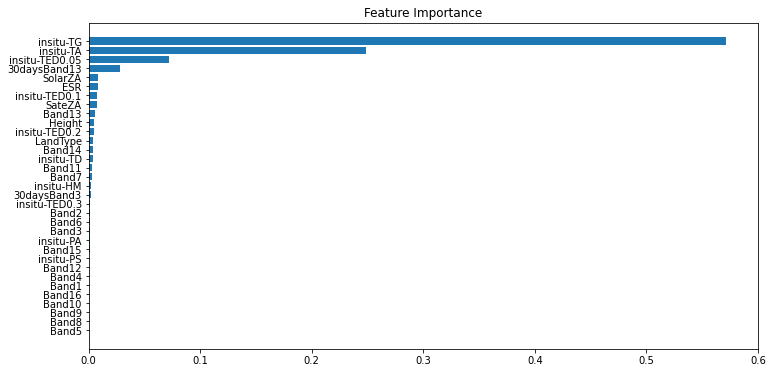

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:25.44303
[1]	validation_0-rmse:25.02923
[2]	validation_0-rmse:24.60448
[3]	validation_0-rmse:24.20061
[4]	validation_0-rmse:23.79022
[5]	validation_0-rmse:23.40384
[6]	validation_0-rmse:23.00704
[7]	validation_0-rmse:22.62329
[8]	validation_0-rmse:22.24621
[9]	validation_0-rmse:21.89753
[10]	validation_0-rmse:21.53252
[11]	validation_0-rmse:21.18292
[12]	validation_0-rmse:20.84025
[13]	validation_0-rmse:20.48667
[14]	validation_0-rmse:20.13933
[15]	validation_0-rmse:19.79764
[16]	validation_0-rmse:19.47743
[17]	validation_0-rmse:19.16256
[18]	validation_0-rmse:18.84877
[19]	validation_0-rmse:18.55461
[20]	validation_0-rmse:18.24645
[21]	validation_0-rmse:17.93704
[22]	validation_0-rmse:17.64756
[23]	validation_0-rmse:17.36278
[24]	validation_0-rmse:17.08327
[25]	validation_0-rmse:16.79355
[26]	validation_0-rmse:16.52386
[27]	validation_0-rmse:16.24367
[28]	validation_0-rmse:15.98223
[29]	validation_0-rmse:15.71129
[30]	validation_0-rmse:15.45058
[31]	validation_0-

[258]	validation_0-rmse:0.54238
[259]	validation_0-rmse:0.53871
[260]	validation_0-rmse:0.53506
[261]	validation_0-rmse:0.52901
[262]	validation_0-rmse:0.52470
[263]	validation_0-rmse:0.52130
[264]	validation_0-rmse:0.51549
[265]	validation_0-rmse:0.50998
[266]	validation_0-rmse:0.50434
[267]	validation_0-rmse:0.49896
[268]	validation_0-rmse:0.49596
[269]	validation_0-rmse:0.49299
[270]	validation_0-rmse:0.48777
[271]	validation_0-rmse:0.48489
[272]	validation_0-rmse:0.48207
[273]	validation_0-rmse:0.47944
[274]	validation_0-rmse:0.47675
[275]	validation_0-rmse:0.47401
[276]	validation_0-rmse:0.47145
[277]	validation_0-rmse:0.46892
[278]	validation_0-rmse:0.46415
[279]	validation_0-rmse:0.46089
[280]	validation_0-rmse:0.45631
[281]	validation_0-rmse:0.45182
[282]	validation_0-rmse:0.44734
[283]	validation_0-rmse:0.44298
[284]	validation_0-rmse:0.44084
[285]	validation_0-rmse:0.43661
[286]	validation_0-rmse:0.43244
[287]	validation_0-rmse:0.43034
[288]	validation_0-rmse:0.42651
[289]	va

[515]	validation_0-rmse:0.22079
[516]	validation_0-rmse:0.22059
[517]	validation_0-rmse:0.22052
[518]	validation_0-rmse:0.22029
[519]	validation_0-rmse:0.22011
[520]	validation_0-rmse:0.21951
[521]	validation_0-rmse:0.21938
[522]	validation_0-rmse:0.21891
[523]	validation_0-rmse:0.21879
[524]	validation_0-rmse:0.21872
[525]	validation_0-rmse:0.21832
[526]	validation_0-rmse:0.21791
[527]	validation_0-rmse:0.21780
[528]	validation_0-rmse:0.21764
[529]	validation_0-rmse:0.21748
[530]	validation_0-rmse:0.21736
[531]	validation_0-rmse:0.21723
[532]	validation_0-rmse:0.21709
[533]	validation_0-rmse:0.21701
[534]	validation_0-rmse:0.21677
[535]	validation_0-rmse:0.21672
[536]	validation_0-rmse:0.21658
[537]	validation_0-rmse:0.21651
[538]	validation_0-rmse:0.21604
[539]	validation_0-rmse:0.21587
[540]	validation_0-rmse:0.21575
[541]	validation_0-rmse:0.21536
[542]	validation_0-rmse:0.21502
[543]	validation_0-rmse:0.21448
[544]	validation_0-rmse:0.21407
[545]	validation_0-rmse:0.21363
[546]	va

[772]	validation_0-rmse:0.17499
[773]	validation_0-rmse:0.17474
[774]	validation_0-rmse:0.17451
[775]	validation_0-rmse:0.17442
[776]	validation_0-rmse:0.17440
[777]	validation_0-rmse:0.17425
[778]	validation_0-rmse:0.17412
[779]	validation_0-rmse:0.17404
[780]	validation_0-rmse:0.17390
[781]	validation_0-rmse:0.17370
[782]	validation_0-rmse:0.17348
[783]	validation_0-rmse:0.17342
[784]	validation_0-rmse:0.17334
[785]	validation_0-rmse:0.17305
[786]	validation_0-rmse:0.17285
[787]	validation_0-rmse:0.17261
[788]	validation_0-rmse:0.17247
[789]	validation_0-rmse:0.17242
[790]	validation_0-rmse:0.17221
[791]	validation_0-rmse:0.17208
[792]	validation_0-rmse:0.17202
[793]	validation_0-rmse:0.17182
[794]	validation_0-rmse:0.17176
[795]	validation_0-rmse:0.17169
[796]	validation_0-rmse:0.17160
[797]	validation_0-rmse:0.17131
[798]	validation_0-rmse:0.17125
[799]	validation_0-rmse:0.17121
[800]	validation_0-rmse:0.17115
[801]	validation_0-rmse:0.17109
[802]	validation_0-rmse:0.17093
[803]	va

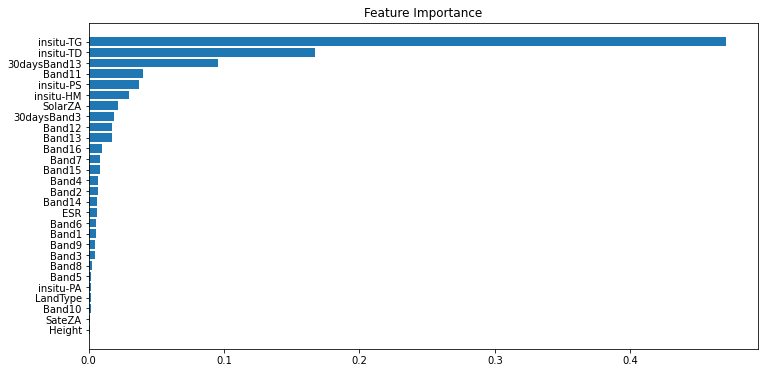

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:30.65841
[1]	validation_0-rmse:30.15172
[2]	validation_0-rmse:29.65369
[3]	validation_0-rmse:29.16430
[4]	validation_0-rmse:28.68137
[5]	validation_0-rmse:28.21559
[6]	validation_0-rmse:27.76118
[7]	validation_0-rmse:27.30639
[8]	validation_0-rmse:26.85997
[9]	validation_0-rmse:26.41749
[10]	validation_0-rmse:25.98219
[11]	validation_0-rmse:25.55450
[12]	validation_0-rmse:25.13574
[13]	validation_0-rmse:24.72164
[14]	validation_0-rmse:24.31542
[15]	validation_0-rmse:23.92990
[16]	validation_0-rmse:23.54134
[17]	validation_0-rmse:23.15554
[18]	validation_0-rmse:22.77593
[19]	validation_0-rmse:22.41143
[20]	validation_0-rmse:22.04849
[21]	validation_0-rmse:21.68756
[22]	validation_0-rmse:21.33261
[23]	validation_0-rmse:20.99045
[24]	validation_0-rmse:20.65537
[25]	validation_0-rmse:20.31984
[26]	validation_0-rmse:19.98866
[27]	validation_0-rmse:19.66307
[28]	validation_0-rmse:19.34153
[29]	validation_0-rmse:19.02866
[30]	validation_0-rmse:18.71943
[31]	validation_0-

[258]	validation_0-rmse:2.19058
[259]	validation_0-rmse:2.18667
[260]	validation_0-rmse:2.18359
[261]	validation_0-rmse:2.18008
[262]	validation_0-rmse:2.17696
[263]	validation_0-rmse:2.17352
[264]	validation_0-rmse:2.17048
[265]	validation_0-rmse:2.16709
[266]	validation_0-rmse:2.16472
[267]	validation_0-rmse:2.16160
[268]	validation_0-rmse:2.15893
[269]	validation_0-rmse:2.15645
[270]	validation_0-rmse:2.15326
[271]	validation_0-rmse:2.14983
[272]	validation_0-rmse:2.14691
[273]	validation_0-rmse:2.14410
[274]	validation_0-rmse:2.14169
[275]	validation_0-rmse:2.13945
[276]	validation_0-rmse:2.13702
[277]	validation_0-rmse:2.13454
[278]	validation_0-rmse:2.13196
[279]	validation_0-rmse:2.12932
[280]	validation_0-rmse:2.12672
[281]	validation_0-rmse:2.12381
[282]	validation_0-rmse:2.12148
[283]	validation_0-rmse:2.11934
[284]	validation_0-rmse:2.11659
[285]	validation_0-rmse:2.11459
[286]	validation_0-rmse:2.11247
[287]	validation_0-rmse:2.11007
[288]	validation_0-rmse:2.10844
[289]	va

[515]	validation_0-rmse:1.89530
[516]	validation_0-rmse:1.89510
[517]	validation_0-rmse:1.89491
[518]	validation_0-rmse:1.89445
[519]	validation_0-rmse:1.89359
[520]	validation_0-rmse:1.89312
[521]	validation_0-rmse:1.89226
[522]	validation_0-rmse:1.89184
[523]	validation_0-rmse:1.89163
[524]	validation_0-rmse:1.89093
[525]	validation_0-rmse:1.89032
[526]	validation_0-rmse:1.88940
[527]	validation_0-rmse:1.88901
[528]	validation_0-rmse:1.88879
[529]	validation_0-rmse:1.88842
[530]	validation_0-rmse:1.88780
[531]	validation_0-rmse:1.88719
[532]	validation_0-rmse:1.88682
[533]	validation_0-rmse:1.88629
[534]	validation_0-rmse:1.88610
[535]	validation_0-rmse:1.88573
[536]	validation_0-rmse:1.88504
[537]	validation_0-rmse:1.88473
[538]	validation_0-rmse:1.88423
[539]	validation_0-rmse:1.88349
[540]	validation_0-rmse:1.88329
[541]	validation_0-rmse:1.88294
[542]	validation_0-rmse:1.88214
[543]	validation_0-rmse:1.88202
[544]	validation_0-rmse:1.88154
[545]	validation_0-rmse:1.88101
[546]	va

[772]	validation_0-rmse:1.79663
[773]	validation_0-rmse:1.79622
[774]	validation_0-rmse:1.79599
[775]	validation_0-rmse:1.79588
[776]	validation_0-rmse:1.79560
[777]	validation_0-rmse:1.79531
[778]	validation_0-rmse:1.79490
[779]	validation_0-rmse:1.79458
[780]	validation_0-rmse:1.79400
[781]	validation_0-rmse:1.79388
[782]	validation_0-rmse:1.79372
[783]	validation_0-rmse:1.79312
[784]	validation_0-rmse:1.79304
[785]	validation_0-rmse:1.79296
[786]	validation_0-rmse:1.79244
[787]	validation_0-rmse:1.79195
[788]	validation_0-rmse:1.79144
[789]	validation_0-rmse:1.79128
[790]	validation_0-rmse:1.79100
[791]	validation_0-rmse:1.79092
[792]	validation_0-rmse:1.79074
[793]	validation_0-rmse:1.79058
[794]	validation_0-rmse:1.79008
[795]	validation_0-rmse:1.78989
[796]	validation_0-rmse:1.78957
[797]	validation_0-rmse:1.78921
[798]	validation_0-rmse:1.78854
[799]	validation_0-rmse:1.78821
[800]	validation_0-rmse:1.78780
[801]	validation_0-rmse:1.78777
[802]	validation_0-rmse:1.78727
[803]	va

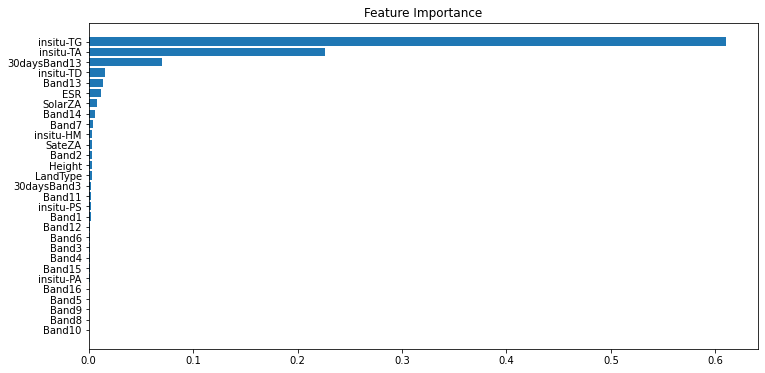

[0]	validation_0-rmse:25.46877
[1]	validation_0-rmse:25.04050
[2]	validation_0-rmse:24.61623
[3]	validation_0-rmse:24.19967
[4]	validation_0-rmse:23.78993


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:23.38843
[6]	validation_0-rmse:22.99362
[7]	validation_0-rmse:22.60295
[8]	validation_0-rmse:22.22147
[9]	validation_0-rmse:21.84580
[10]	validation_0-rmse:21.47816
[11]	validation_0-rmse:21.11448
[12]	validation_0-rmse:20.75931
[13]	validation_0-rmse:20.40586
[14]	validation_0-rmse:20.06186
[15]	validation_0-rmse:19.72318
[16]	validation_0-rmse:19.38938
[17]	validation_0-rmse:19.06114
[18]	validation_0-rmse:18.73968
[19]	validation_0-rmse:18.42374
[20]	validation_0-rmse:18.11467
[21]	validation_0-rmse:17.80885
[22]	validation_0-rmse:17.50888
[23]	validation_0-rmse:17.21363
[24]	validation_0-rmse:16.92469
[25]	validation_0-rmse:16.64019
[26]	validation_0-rmse:16.35867
[27]	validation_0-rmse:16.08309
[28]	validation_0-rmse:15.81211
[29]	validation_0-rmse:15.54496
[30]	validation_0-rmse:15.28101
[31]	validation_0-rmse:15.02301
[32]	validation_0-rmse:14.77162
[33]	validation_0-rmse:14.52159
[34]	validation_0-rmse:14.27875
[35]	validation_0-rmse:14.03781
[36]	validati

[263]	validation_0-rmse:0.44888
[264]	validation_0-rmse:0.44498
[265]	validation_0-rmse:0.44062
[266]	validation_0-rmse:0.43670
[267]	validation_0-rmse:0.43279
[268]	validation_0-rmse:0.42882
[269]	validation_0-rmse:0.42466
[270]	validation_0-rmse:0.42119
[271]	validation_0-rmse:0.41788
[272]	validation_0-rmse:0.41392
[273]	validation_0-rmse:0.41057
[274]	validation_0-rmse:0.40736
[275]	validation_0-rmse:0.40356
[276]	validation_0-rmse:0.40050
[277]	validation_0-rmse:0.39673
[278]	validation_0-rmse:0.39386
[279]	validation_0-rmse:0.39100
[280]	validation_0-rmse:0.38825
[281]	validation_0-rmse:0.38563
[282]	validation_0-rmse:0.38304
[283]	validation_0-rmse:0.38047
[284]	validation_0-rmse:0.37797
[285]	validation_0-rmse:0.37505
[286]	validation_0-rmse:0.37199
[287]	validation_0-rmse:0.36948
[288]	validation_0-rmse:0.36707
[289]	validation_0-rmse:0.36414
[290]	validation_0-rmse:0.36159
[291]	validation_0-rmse:0.35891
[292]	validation_0-rmse:0.35631
[293]	validation_0-rmse:0.35376
[294]	va

[520]	validation_0-rmse:0.20457
[521]	validation_0-rmse:0.20447
[522]	validation_0-rmse:0.20432
[523]	validation_0-rmse:0.20397
[524]	validation_0-rmse:0.20390
[525]	validation_0-rmse:0.20376
[526]	validation_0-rmse:0.20371
[527]	validation_0-rmse:0.20351
[528]	validation_0-rmse:0.20346
[529]	validation_0-rmse:0.20342
[530]	validation_0-rmse:0.20317
[531]	validation_0-rmse:0.20313
[532]	validation_0-rmse:0.20303
[533]	validation_0-rmse:0.20267
[534]	validation_0-rmse:0.20260
[535]	validation_0-rmse:0.20257
[536]	validation_0-rmse:0.20234
[537]	validation_0-rmse:0.20213
[538]	validation_0-rmse:0.20200
[539]	validation_0-rmse:0.20195
[540]	validation_0-rmse:0.20191
[541]	validation_0-rmse:0.20172
[542]	validation_0-rmse:0.20166
[543]	validation_0-rmse:0.20160
[544]	validation_0-rmse:0.20148
[545]	validation_0-rmse:0.20144
[546]	validation_0-rmse:0.20093
[547]	validation_0-rmse:0.20069
[548]	validation_0-rmse:0.20055
[549]	validation_0-rmse:0.20044
[550]	validation_0-rmse:0.20043
[551]	va

[777]	validation_0-rmse:0.17855
[778]	validation_0-rmse:0.17852
[779]	validation_0-rmse:0.17845
[780]	validation_0-rmse:0.17837
[781]	validation_0-rmse:0.17828
[782]	validation_0-rmse:0.17823
[783]	validation_0-rmse:0.17817
[784]	validation_0-rmse:0.17809
[785]	validation_0-rmse:0.17808
[786]	validation_0-rmse:0.17799
[787]	validation_0-rmse:0.17784
[788]	validation_0-rmse:0.17780
[789]	validation_0-rmse:0.17762
[790]	validation_0-rmse:0.17757
[791]	validation_0-rmse:0.17748
[792]	validation_0-rmse:0.17741
[793]	validation_0-rmse:0.17737
[794]	validation_0-rmse:0.17733
[795]	validation_0-rmse:0.17723
[796]	validation_0-rmse:0.17721
[797]	validation_0-rmse:0.17716
[798]	validation_0-rmse:0.17712
[799]	validation_0-rmse:0.17712
[800]	validation_0-rmse:0.17710
[801]	validation_0-rmse:0.17702
[802]	validation_0-rmse:0.17698
[803]	validation_0-rmse:0.17696
[804]	validation_0-rmse:0.17682
[805]	validation_0-rmse:0.17676
[806]	validation_0-rmse:0.17661
[807]	validation_0-rmse:0.17662
[808]	va

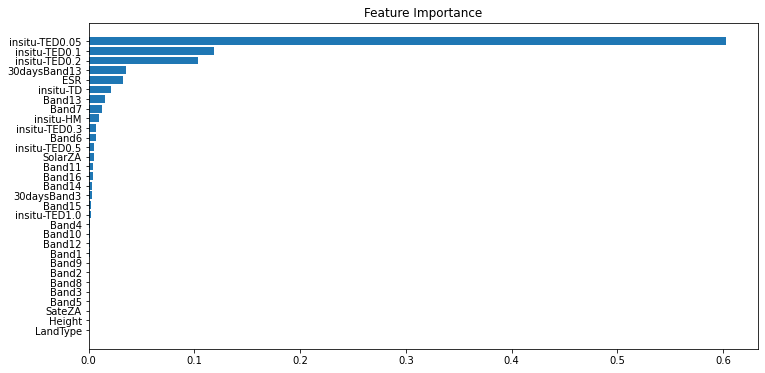

[0]	validation_0-rmse:27.70340
[1]	validation_0-rmse:27.24863
[2]	validation_0-rmse:26.79205


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:26.34802
[4]	validation_0-rmse:25.91124
[5]	validation_0-rmse:25.49070
[6]	validation_0-rmse:25.06918
[7]	validation_0-rmse:24.65447
[8]	validation_0-rmse:24.24958
[9]	validation_0-rmse:23.85395
[10]	validation_0-rmse:23.45718
[11]	validation_0-rmse:23.07272
[12]	validation_0-rmse:22.69765
[13]	validation_0-rmse:22.31969
[14]	validation_0-rmse:21.95661
[15]	validation_0-rmse:21.59340
[16]	validation_0-rmse:21.23655
[17]	validation_0-rmse:20.89148
[18]	validation_0-rmse:20.54707
[19]	validation_0-rmse:20.21457
[20]	validation_0-rmse:19.88119
[21]	validation_0-rmse:19.55914
[22]	validation_0-rmse:19.24065
[23]	validation_0-rmse:18.92775
[24]	validation_0-rmse:18.61389
[25]	validation_0-rmse:18.30796
[26]	validation_0-rmse:18.01165
[27]	validation_0-rmse:17.71488
[28]	validation_0-rmse:17.41965
[29]	validation_0-rmse:17.13003
[30]	validation_0-rmse:16.85582
[31]	validation_0-rmse:16.57897
[32]	validation_0-rmse:16.30416
[33]	validation_0-rmse:16.04137
[34]	validation

[261]	validation_0-rmse:0.83343
[262]	validation_0-rmse:0.82959
[263]	validation_0-rmse:0.82628
[264]	validation_0-rmse:0.82282
[265]	validation_0-rmse:0.82001
[266]	validation_0-rmse:0.81734
[267]	validation_0-rmse:0.81406
[268]	validation_0-rmse:0.81029
[269]	validation_0-rmse:0.80719
[270]	validation_0-rmse:0.80488
[271]	validation_0-rmse:0.80136
[272]	validation_0-rmse:0.79788
[273]	validation_0-rmse:0.79503
[274]	validation_0-rmse:0.79252
[275]	validation_0-rmse:0.79009
[276]	validation_0-rmse:0.78752
[277]	validation_0-rmse:0.78446
[278]	validation_0-rmse:0.78170
[279]	validation_0-rmse:0.77918
[280]	validation_0-rmse:0.77762
[281]	validation_0-rmse:0.77492
[282]	validation_0-rmse:0.77324
[283]	validation_0-rmse:0.77116
[284]	validation_0-rmse:0.76991
[285]	validation_0-rmse:0.76814
[286]	validation_0-rmse:0.76680
[287]	validation_0-rmse:0.76494
[288]	validation_0-rmse:0.76347
[289]	validation_0-rmse:0.76193
[290]	validation_0-rmse:0.76069
[291]	validation_0-rmse:0.75881
[292]	va

[518]	validation_0-rmse:0.66003
[519]	validation_0-rmse:0.65979
[520]	validation_0-rmse:0.65936
[521]	validation_0-rmse:0.65886
[522]	validation_0-rmse:0.65825
[523]	validation_0-rmse:0.65823
[524]	validation_0-rmse:0.65768
[525]	validation_0-rmse:0.65727
[526]	validation_0-rmse:0.65710
[527]	validation_0-rmse:0.65684
[528]	validation_0-rmse:0.65680
[529]	validation_0-rmse:0.65664
[530]	validation_0-rmse:0.65662
[531]	validation_0-rmse:0.65651
[532]	validation_0-rmse:0.65649
[533]	validation_0-rmse:0.65626
[534]	validation_0-rmse:0.65627
[535]	validation_0-rmse:0.65617
[536]	validation_0-rmse:0.65610
[537]	validation_0-rmse:0.65595
[538]	validation_0-rmse:0.65584
[539]	validation_0-rmse:0.65563
[540]	validation_0-rmse:0.65545
[541]	validation_0-rmse:0.65518
[542]	validation_0-rmse:0.65523
[543]	validation_0-rmse:0.65523
[544]	validation_0-rmse:0.65456
[545]	validation_0-rmse:0.65439
[546]	validation_0-rmse:0.65433
[547]	validation_0-rmse:0.65416
[548]	validation_0-rmse:0.65414
[549]	va

[775]	validation_0-rmse:0.63316
[776]	validation_0-rmse:0.63325
[777]	validation_0-rmse:0.63322
[778]	validation_0-rmse:0.63308
[779]	validation_0-rmse:0.63294
[780]	validation_0-rmse:0.63295
[781]	validation_0-rmse:0.63282
[782]	validation_0-rmse:0.63241
[783]	validation_0-rmse:0.63219
[784]	validation_0-rmse:0.63211
[785]	validation_0-rmse:0.63213
[786]	validation_0-rmse:0.63206
[787]	validation_0-rmse:0.63205
[788]	validation_0-rmse:0.63205
[789]	validation_0-rmse:0.63200
[790]	validation_0-rmse:0.63182
[791]	validation_0-rmse:0.63163
[792]	validation_0-rmse:0.63153
[793]	validation_0-rmse:0.63135
[794]	validation_0-rmse:0.63129
[795]	validation_0-rmse:0.63108
[796]	validation_0-rmse:0.63092
[797]	validation_0-rmse:0.63084
[798]	validation_0-rmse:0.63092
[799]	validation_0-rmse:0.63085
[800]	validation_0-rmse:0.63074
[801]	validation_0-rmse:0.63085
[802]	validation_0-rmse:0.63078
[803]	validation_0-rmse:0.63076
[804]	validation_0-rmse:0.63082
[805]	validation_0-rmse:0.63075
[806]	va

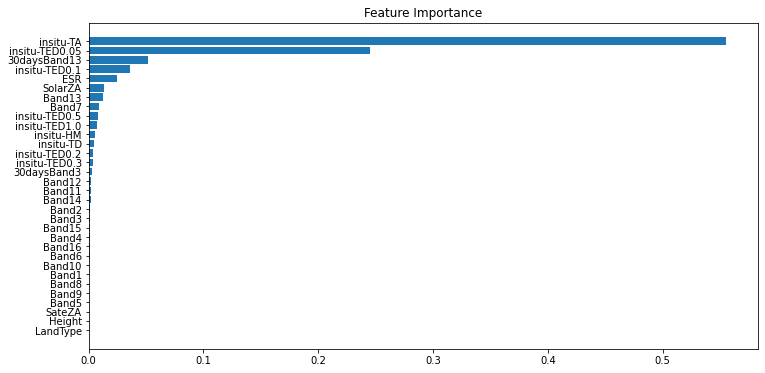

[0]	validation_0-rmse:26.26529
[1]	validation_0-rmse:25.82258
[2]	validation_0-rmse:25.39736
[3]	validation_0-rmse:24.96857
[4]	validation_0-rmse:24.55848
[5]	validation_0-rmse:24.14558


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:23.73774
[7]	validation_0-rmse:23.40434
[8]	validation_0-rmse:23.03681
[9]	validation_0-rmse:22.67297
[10]	validation_0-rmse:22.31700
[11]	validation_0-rmse:21.93999
[12]	validation_0-rmse:21.58072
[13]	validation_0-rmse:21.24139
[14]	validation_0-rmse:20.88326
[15]	validation_0-rmse:20.53157
[16]	validation_0-rmse:20.21326
[17]	validation_0-rmse:19.89872
[18]	validation_0-rmse:19.56273
[19]	validation_0-rmse:19.24054
[20]	validation_0-rmse:18.91527
[21]	validation_0-rmse:18.63529
[22]	validation_0-rmse:18.32114
[23]	validation_0-rmse:18.01163
[24]	validation_0-rmse:17.73036
[25]	validation_0-rmse:17.43149
[26]	validation_0-rmse:17.13700
[27]	validation_0-rmse:16.85950
[28]	validation_0-rmse:16.57495
[29]	validation_0-rmse:16.31774
[30]	validation_0-rmse:16.06260
[31]	validation_0-rmse:15.80246
[32]	validation_0-rmse:15.53582
[33]	validation_0-rmse:15.28267
[34]	validation_0-rmse:15.02562
[35]	validation_0-rmse:14.77290
[36]	validation_0-rmse:14.52393
[37]	validat

[264]	validation_0-rmse:0.52126
[265]	validation_0-rmse:0.51627
[266]	validation_0-rmse:0.51246
[267]	validation_0-rmse:0.50787
[268]	validation_0-rmse:0.50320
[269]	validation_0-rmse:0.49925
[270]	validation_0-rmse:0.49547
[271]	validation_0-rmse:0.49106
[272]	validation_0-rmse:0.48524
[273]	validation_0-rmse:0.48158
[274]	validation_0-rmse:0.47599
[275]	validation_0-rmse:0.47040
[276]	validation_0-rmse:0.46658
[277]	validation_0-rmse:0.46313
[278]	validation_0-rmse:0.45759
[279]	validation_0-rmse:0.45232
[280]	validation_0-rmse:0.44723
[281]	validation_0-rmse:0.44340
[282]	validation_0-rmse:0.43983
[283]	validation_0-rmse:0.43502
[284]	validation_0-rmse:0.43044
[285]	validation_0-rmse:0.42587
[286]	validation_0-rmse:0.42130
[287]	validation_0-rmse:0.41853
[288]	validation_0-rmse:0.41406
[289]	validation_0-rmse:0.40957
[290]	validation_0-rmse:0.40525
[291]	validation_0-rmse:0.40223
[292]	validation_0-rmse:0.39806
[293]	validation_0-rmse:0.39389
[294]	validation_0-rmse:0.39120
[295]	va

[521]	validation_0-rmse:0.18781
[522]	validation_0-rmse:0.18772
[523]	validation_0-rmse:0.18768
[524]	validation_0-rmse:0.18749
[525]	validation_0-rmse:0.18738
[526]	validation_0-rmse:0.18728
[527]	validation_0-rmse:0.18695
[528]	validation_0-rmse:0.18661
[529]	validation_0-rmse:0.18614
[530]	validation_0-rmse:0.18587
[531]	validation_0-rmse:0.18544
[532]	validation_0-rmse:0.18514
[533]	validation_0-rmse:0.18486
[534]	validation_0-rmse:0.18452
[535]	validation_0-rmse:0.18434
[536]	validation_0-rmse:0.18427
[537]	validation_0-rmse:0.18417
[538]	validation_0-rmse:0.18409
[539]	validation_0-rmse:0.18400
[540]	validation_0-rmse:0.18387
[541]	validation_0-rmse:0.18368
[542]	validation_0-rmse:0.18355
[543]	validation_0-rmse:0.18338
[544]	validation_0-rmse:0.18331
[545]	validation_0-rmse:0.18295
[546]	validation_0-rmse:0.18285
[547]	validation_0-rmse:0.18277
[548]	validation_0-rmse:0.18246
[549]	validation_0-rmse:0.18239
[550]	validation_0-rmse:0.18223
[551]	validation_0-rmse:0.18216
[552]	va

[778]	validation_0-rmse:0.16264
[779]	validation_0-rmse:0.16262
[780]	validation_0-rmse:0.16260
[781]	validation_0-rmse:0.16249
[782]	validation_0-rmse:0.16238
[783]	validation_0-rmse:0.16233
[784]	validation_0-rmse:0.16231
[785]	validation_0-rmse:0.16230
[786]	validation_0-rmse:0.16220
[787]	validation_0-rmse:0.16220
[788]	validation_0-rmse:0.16218
[789]	validation_0-rmse:0.16207
[790]	validation_0-rmse:0.16205
[791]	validation_0-rmse:0.16203
[792]	validation_0-rmse:0.16200
[793]	validation_0-rmse:0.16189
[794]	validation_0-rmse:0.16185
[795]	validation_0-rmse:0.16186
[796]	validation_0-rmse:0.16174
[797]	validation_0-rmse:0.16173
[798]	validation_0-rmse:0.16172
[799]	validation_0-rmse:0.16166
[800]	validation_0-rmse:0.16162
[801]	validation_0-rmse:0.16160
[802]	validation_0-rmse:0.16157
[803]	validation_0-rmse:0.16155
[804]	validation_0-rmse:0.16142
[805]	validation_0-rmse:0.16142
[806]	validation_0-rmse:0.16139
[807]	validation_0-rmse:0.16139
[808]	validation_0-rmse:0.16139
[809]	va

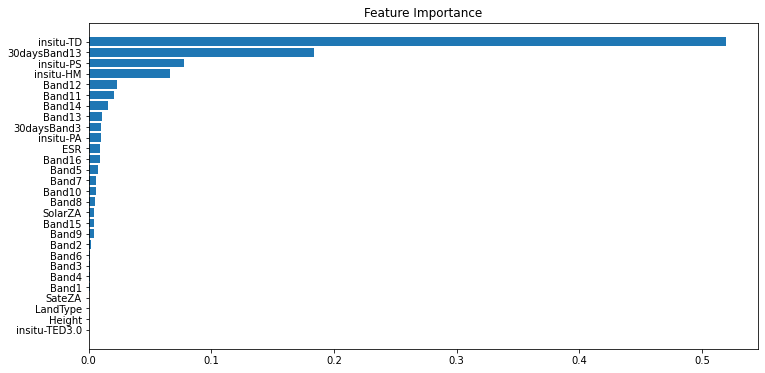

[0]	validation_0-rmse:31.99292


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:31.46320
[2]	validation_0-rmse:30.94389
[3]	validation_0-rmse:30.43277
[4]	validation_0-rmse:29.93635
[5]	validation_0-rmse:29.44179
[6]	validation_0-rmse:28.95707
[7]	validation_0-rmse:28.48482
[8]	validation_0-rmse:28.01763
[9]	validation_0-rmse:27.55963
[10]	validation_0-rmse:27.11333
[11]	validation_0-rmse:26.67018
[12]	validation_0-rmse:26.25239
[13]	validation_0-rmse:25.82859
[14]	validation_0-rmse:25.40619
[15]	validation_0-rmse:24.99351
[16]	validation_0-rmse:24.58719
[17]	validation_0-rmse:24.18555
[18]	validation_0-rmse:23.79342
[19]	validation_0-rmse:23.40580
[20]	validation_0-rmse:23.02574
[21]	validation_0-rmse:22.65072
[22]	validation_0-rmse:22.27959
[23]	validation_0-rmse:21.91683
[24]	validation_0-rmse:21.57150
[25]	validation_0-rmse:21.22012
[26]	validation_0-rmse:20.87401
[27]	validation_0-rmse:20.54084
[28]	validation_0-rmse:20.20836
[29]	validation_0-rmse:19.88021
[30]	validation_0-rmse:19.55859
[31]	validation_0-rmse:19.25640
[32]	validation_0

[259]	validation_0-rmse:1.64086
[260]	validation_0-rmse:1.63686
[261]	validation_0-rmse:1.63265
[262]	validation_0-rmse:1.62914
[263]	validation_0-rmse:1.62499
[264]	validation_0-rmse:1.61886
[265]	validation_0-rmse:1.61496
[266]	validation_0-rmse:1.61187
[267]	validation_0-rmse:1.60859
[268]	validation_0-rmse:1.60545
[269]	validation_0-rmse:1.60163
[270]	validation_0-rmse:1.59790
[271]	validation_0-rmse:1.59623
[272]	validation_0-rmse:1.59320
[273]	validation_0-rmse:1.58904
[274]	validation_0-rmse:1.58539
[275]	validation_0-rmse:1.58267
[276]	validation_0-rmse:1.57957
[277]	validation_0-rmse:1.57609
[278]	validation_0-rmse:1.57204
[279]	validation_0-rmse:1.56843
[280]	validation_0-rmse:1.56650
[281]	validation_0-rmse:1.56364
[282]	validation_0-rmse:1.56130
[283]	validation_0-rmse:1.55749
[284]	validation_0-rmse:1.55535
[285]	validation_0-rmse:1.55286
[286]	validation_0-rmse:1.55078
[287]	validation_0-rmse:1.54757
[288]	validation_0-rmse:1.54427
[289]	validation_0-rmse:1.54027
[290]	va

[516]	validation_0-rmse:1.31392
[517]	validation_0-rmse:1.31307
[518]	validation_0-rmse:1.31253
[519]	validation_0-rmse:1.31148
[520]	validation_0-rmse:1.31102
[521]	validation_0-rmse:1.31105
[522]	validation_0-rmse:1.31039
[523]	validation_0-rmse:1.30974
[524]	validation_0-rmse:1.30909
[525]	validation_0-rmse:1.30904
[526]	validation_0-rmse:1.30881
[527]	validation_0-rmse:1.30777
[528]	validation_0-rmse:1.30734
[529]	validation_0-rmse:1.30668
[530]	validation_0-rmse:1.30642
[531]	validation_0-rmse:1.30566
[532]	validation_0-rmse:1.30560
[533]	validation_0-rmse:1.30529
[534]	validation_0-rmse:1.30437
[535]	validation_0-rmse:1.30422
[536]	validation_0-rmse:1.30359
[537]	validation_0-rmse:1.30332
[538]	validation_0-rmse:1.30285
[539]	validation_0-rmse:1.30267
[540]	validation_0-rmse:1.30220
[541]	validation_0-rmse:1.30209
[542]	validation_0-rmse:1.30165
[543]	validation_0-rmse:1.30149
[544]	validation_0-rmse:1.30110
[545]	validation_0-rmse:1.30055
[546]	validation_0-rmse:1.30047
[547]	va

[773]	validation_0-rmse:1.24070
[774]	validation_0-rmse:1.24051
[775]	validation_0-rmse:1.24045
[776]	validation_0-rmse:1.24002
[777]	validation_0-rmse:1.24009
[778]	validation_0-rmse:1.23962
[779]	validation_0-rmse:1.23927
[780]	validation_0-rmse:1.23925
[781]	validation_0-rmse:1.23915
[782]	validation_0-rmse:1.23892
[783]	validation_0-rmse:1.23892
[784]	validation_0-rmse:1.23879
[785]	validation_0-rmse:1.23836
[786]	validation_0-rmse:1.23818
[787]	validation_0-rmse:1.23834
[788]	validation_0-rmse:1.23781
[789]	validation_0-rmse:1.23774
[790]	validation_0-rmse:1.23773
[791]	validation_0-rmse:1.23763
[792]	validation_0-rmse:1.23760
[793]	validation_0-rmse:1.23759
[794]	validation_0-rmse:1.23760
[795]	validation_0-rmse:1.23726
[796]	validation_0-rmse:1.23658
[797]	validation_0-rmse:1.23655
[798]	validation_0-rmse:1.23653
[799]	validation_0-rmse:1.23639
[800]	validation_0-rmse:1.23608
[801]	validation_0-rmse:1.23590
[802]	validation_0-rmse:1.23577
[803]	validation_0-rmse:1.23562
[804]	va

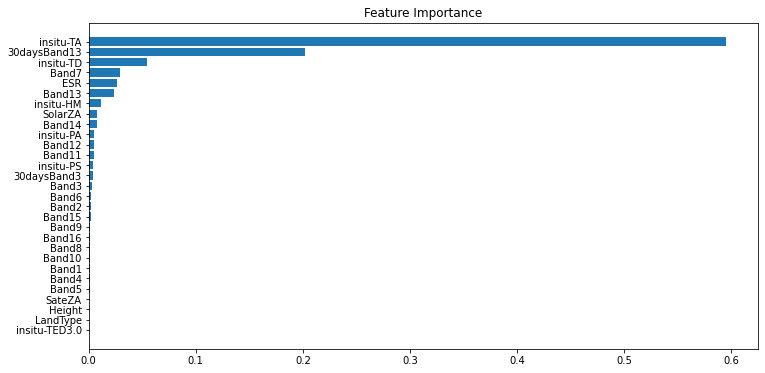

In [11]:
with tf.device('/CPU:0'):

    for i in range(1, 8):
        model_train(i, curr_dir)